# Monte Carlo Methods

In [16]:
import datetime as dt

import matplotlib.pylab as plt
import numpy as np
import pandas_datareader.data as web
import seaborn as sns
import timeit
import numpy as np
sns.set(context='notebook')

## Doel

In de tweede helft van de workshop ga je door middel van Monte Carlo onderzoeken hoe de spreiding van een aandeel zich zal verlopen. Aandelen kunnen zich op nagenoeg oneindig veel manieren ontwikkelen. Hoe de prijs van morgen, de state, ten opzichte van vandaag eruit ziet is niet te voorspellen. Door middel van Monte Carlo gaan we het verloop honderden tot duizenden malen simuleren en een kansverdeling opstellen. Op het einde van de workshop gaan we een groot nadeel van de Monte Carlo Method ondervinden, hoeveel herhalingen van de simulatie kan jouw computer aan?

Aan het einde van deze workshop is het de bedoeling dat je plots er als volgt uitzien. Deze foto zal je waarschijnlijk herkennen van de presentatie:
<img src="attachments/photo1.png" align="center">

***

## Deel 1: Functies schrijven
Voor dit eerste deel schrijven we een functie die het verloop van een willekeurig aandeel berekent. De return-waarde dient een lijst te zijn van lengte $n$ te zijn. Hierbij staat $n$ voor het aantal dagen dat de Monte Carlo-simulatie vooruit gaat voorspellen. In de code heet deze variabele `days`. Verder dient er een startprijs, `start_price`, voor de voorspelling te worden ingegeven. Vanaf deze prijs zal voor $n$ dagen het verloop worden voorspeld. Het laatste argument is `STD`. Dit is de standaard deviatie met welke voorspellende waardes gegeven een normaalverdeling worden gegenereerd.

De formule om de prijs voor morgen, gegeven de prijs van vandaag, te berekenen is als volgt:

$$ Price_{n+1} = Price_{n} \times (1 + {\mathcal{N}(0,\,\sigma)})$$

Oftewel, de prijs van vandaag vermenigvuldigd met een waarde. Deze waarde zijnde $1$ plus een willekeurige getal uit een normaalverdeling met $\mu=0$ en een door de gebruiker gegeven $\sigma$. Hoe de waarde voor $\sigma$ wordt bepaald, zal verderop in het document worden toegelicht. Voorlopig is het doel om de functie werkende te krijgen, verderop in de notebook gaan we realistische waarden genereren.

In [17]:
def calc_price(start_price=25, days=100, STD=0.05):
    prices = [start_price]
    for i in range(days):
        prices.append(prices[i] * (1 + np.random.normal(0, STD)))
    return prices

Met bovenstaande functie `calc_price` kunnen we één herhaling simuleren. Uiteraard hebben we hier niet genoeg aan.

Schrijf een functie die bovenstaande functie $n$  maal herhaalt. De return waarde hiervan moet een lijst zijn. Deze lijst dient $n$ lijsten te bevatten welke ieder `days` aan elementen bevat. Oftewel, de return bestaat uit een lijst van simulaties.

In [18]:
def calc_all_prices(n=100, start_price=25, days=100, STD=0.05):
    return [calc_price(start_price, days, STD) for i in range(n)]

Als het goed is kan je nu met `calc_all_prices` data genereren. Met de argumenten `n` en `days` mag je zelf experimenteren. Wij raden voorlopig 100 resp. 100 voor deze twee variabelen aan.

***

## Deel 2: Realistische waarden

Voor de variabelen `start_price` en `STD` zijn echter nog geen realistische waarden gekozen. Pas onderstaande functie zo aan dat deze de laatst bekende sluitingsprijs en de standaard deviatie van de procentuele verandering van het afgelopen jaar returnen. Deze twee waarden kunnen wij vervolgens gebruiken om de functie `calc_all_prices` te verbeteren met realistischere waarden.

Enkele leuke stocks om mee te experimenteren zijn:
- NKE
- DIS
- CSCO
- MCD
- AAPL
- IBM

> Let op! Voor de standaard deviatie van de procentuele verandering (Percentage Change) van de aandelen dien je twee achtereenvolgende functies uit te voeren op de lijst `stocks`.

In [19]:
def get_stocks_2019(stock):
    start = dt.datetime(2019, 1, 1)  # Startdatum van data
    end = dt.datetime(2019, 12, 31)  # Einddatum van data

    stocks = web.DataReader(stock, 'yahoo', start, end)['Close']  # Haalt de kolom 'Close' van stock 'stock' op

    # Pas onderstaande variabelen aan
    last_price = stocks[-1]
    std_of_pct_change = stocks.pct_change().std()

    return last_price, std_of_pct_change

Probeer in onderstaande cell eens om voor 100 herhalingen/simulaties, 100 dagen aan **AAPL** (Apple) stocks te voorspellen:

> Let op! Het ophalen van stockdata kan enkele seconden duren.

In [20]:
# Bereken eerst de laatst bekende prijs en de st. dev. van de proc. ver..
last_price, std_of_pct_change = get_stocks_2019('AAPL')

# Bereken vervolgens door middel van bovenstaande twee variabelen het verloop van 100 simulaties voor 100 dagen
all_prices = calc_all_prices(n=100, start_price=last_price, days=100, STD=std_of_pct_change)

Als het goed is heb je nu een lijst met 100 simulaties van het vermoedelijke beursverloop van **AAPL**.

***


## Deel 3: Gegevens visualiseren
Nu je data kunt genereren, dient dit nog te worden gevisualiseerd. Maak een Seaborn-lineplot welke lijkt op de foto bovenaan deze notebook. Op de x-as dient het tijdsverloop en op de y-as de prijs te komen. Als input dien je het resultaat van `calc_all_prices` te geven.

Is er al een trend te ontdekken in de plot?

> Bonuspunten: Voor degene met een mooie titel en as-labels

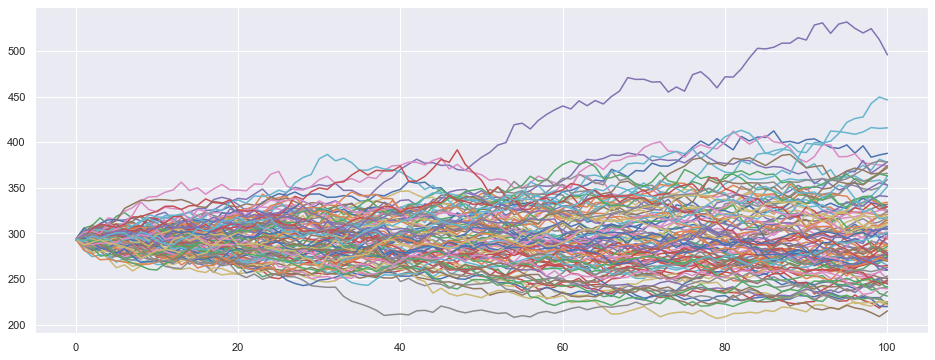

In [25]:
def plot_verloop(data):
    
    plt.figure(figsize=(16,6))
    for i in data:
        sns.lineplot(list(range(len(i))), i)
    
    plt.show()

plot_verloop(all_prices)

Mooi! Nu kan je -als het goed is- het mogelijke verloop van de stockprijs laten zien. Echter kunnen we hier nog geen conclusies uit trekken. Door 100 simulaties uit te voeren hebben we hopelijk genoeg data kunnen genereren om een globale trend te kunnen herkennen. Dit is één van de doelen van Monte Carlo Methods: uit veel repetities van een simulatie een trend kunnen halen.

In onderstaande cell dien je een histogram te plotten van de verzamelde data. Ook hier geldt als input het resultaat van `calc_all_prices`. Zorg dat in de titel het gemiddelde ($\mu$) en de standaard deviatie ($\sigma$) van de data staan.

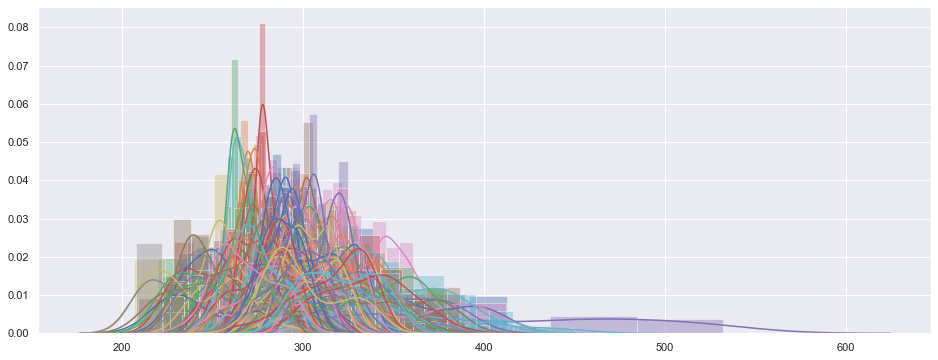

In [27]:
def plot_norm_dist(data):
    
    plt.figure(figsize=(16,6))
    for i in data:
        sns.distplot(i)
    
    plt.show()
    
plot_norm_dist(all_prices)

Te zien is dat de data redelijk normaal verdeeld is rond het gemiddelde. Hier kunnen we wat mee!

***

## Deel 4: tijdscomplexiteit

Gefeliciteerd! In de vorige delen heb je het volledige proces van Monte Carlo doorlopen. In het vierde en laatste deel van deze helft van de workshop ga je een van de nadelen van Monte Carlo verder uitpluizen.

Ga met behulp van de `timeit`-module meten hoelang het genereren van data voor verschillende samplesizes duurt. Gebruik weer de functie `calc_all_prices` Kies enkele verschillende waarden voor het aantal simulaties, $n$. Bijvoorbeeld 100, 1.000 en 10.000.

En? heeft je computer al moeite met 10.000 of pas bij 100.000? Dit is het grote nadeel van Monte Carlo waar we het eerder in de presentatie over hadden.

In [28]:
last_price, std = get_stocks_2019('AAPL')

Time hier hoelang het duur om ```calc_all_prices()``` te runnen met n = 100. Gebruik hiervoor ```%timeit```

In [29]:
%timeit calc_all_prices(n=100, start_price=last_price, days=100, STD=std)

46.4 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Time hier hoelang het duur om ```calc_all_prices()``` te runnen met n = 1_000. Gebruik hiervoor ```%timeit```

In [30]:
%timeit calc_all_prices(n=1000, start_price=last_price, days=100, STD=std)

484 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Time hier hoelang het duur om ```calc_all_prices()``` te runnen met n = 10_000. Gebruik hiervoor ```%timeit```

In [32]:
%timeit calc_all_prices(n=10000, start_price=last_price, days=100, STD=std)

4.67 s ± 39.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Te zien is dat de tijd met $n$ toeneemt. Welke mogelijkheden kan jij verzinnen om dit proces te versnellen?

***

## Bronnen

- codebliss. (2017). Simple Monte Carlo Simulation of Stock Prices with Python [Video file]. Geraadpleegd van https://www.youtube.com/watch?v=_T0l015ecK4

- Machine Learning with Phil. (2018a). Reinforcement Learning in the OpenAI Gym (Tutorial) - Monte Carlo w/o exploring starts [Video file]. Geraadpleegd van https://www.youtube.com/watch?v=e8ofon3sg8E

- Machine Learning with Phil. (2018b). Reinforcement Learning in the OpenAI Gym (Tutorial) - Off-policy Monte Carlo control [Video file]. Geraadpleegd van https://www.youtube.com/watch?v=TvO0Sa-6UVc

- Mahajan, P. (2019, 14 januari). Playing Blackjack Using Model Free Reinforcement Learning. Geraadpleegd op 7 maart 2020, van https://towardsdatascience.com/playing-blackjack-using-model-free-reinforcement-learning-in-google-colab-aa2041a2c13d

- OpenAI. (2020). Gym: A toolkit for developing and comparing reinforcement learning algorithms. Geraadpleegd op 7 maart 2020, van https://gym.openai.com/docs/

- Scikit-Monaco. (2020). Scikit-Monaco Documentation — Scikit-monaco 0.3-dev documentation. Geraadpleegd op 7 maart 2020, van https://scikit-monaco.readthedocs.io/en/latest/

- StackExchange-bijdragers. (2017, 27 december). Why is the term “Monte Carlo simulation” used instead of “Random simulation”? Geraadpleegd op 7 maart 2020, van https://stats.stackexchange.com/questions/320568/why-is-the-term-monte-carlo-simulation-used-instead-of-random-simulation

- Wikipedia-bijdragers. (2018, 2 juli). Monte-Carlosimulatie. Geraadpleegd op 7 maart 2020, van https://nl.wikipedia.org/wiki/Monte-Carlosimulatie